### 1. Importing and Inspecting the Dataset


In [1]:
#import required libraries

import warnings 
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd


In [2]:
#importing the lead Scroing dataset
lead=pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 2. DataCleaning and Preparation

In [5]:
# Chacking the missing percentage of data in each column.
Missing_perc=(round(lead.isnull().sum()/len(lead.index),2))*100
print(Missing_perc)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [6]:
# making list of columns where percentage value is greter than 40 so that we can drop them.
delete=Missing_perc[Missing_perc>40.0].index
delete

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [7]:
# Deleting columns from lead dataframe
lead.drop(delete,axis=1,inplace=True)
lead.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [8]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Checking the missing value and Imputing them

#### 1. Country Column:


In [9]:
lead['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [10]:
# As from above we can see that 95% of the data belogs to India hence we will replace NaN with India
lead['Country'].replace(np.nan, 'India',inplace=True)

In [11]:
lead['Country'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9240 entries, 0 to 9239
Series name: Country
Non-Null Count  Dtype 
--------------  ----- 
9240 non-null   object
dtypes: object(1)
memory usage: 72.3+ KB


#### 2. Specialization Column:


In [12]:

lead['Specialization'].value_counts(normalize=True)*100

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

In [13]:
# First we need to change 'Select' value to NaN, and then check the percentage of column if more than 40 then will drop it,
# else replace it with the 'Others' as there might be some student which don't have any specilization yet.

lead['Specialization'].replace('Select',np.nan, inplace=True)
round(100*(lead['Specialization'].isnull().sum()/len(lead.index)),2) # before the nan value was 16%

36.58

In [14]:
# As the value is around  37% close to 40% but for now will just replace it with 'Others'
lead['Specialization'].replace(np.nan,'Others', inplace=True)

#### 3. How did you hear about X Education Column:


In [15]:
lead['How did you hear about X Education'].value_counts(normalize=True)*100

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

In [16]:
# As the column has 71% value as "Select" which is of no use hence dropping the column
lead.drop('How did you hear about X Education',axis=1,inplace=True)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


#### 4.  What is your current occupation Cloumn:


In [17]:
lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [18]:
# So most the people are unemployed(85%), hence will impute missing value with the same.
lead['What is your current occupation'].replace(np.nan,'Unemployed',inplace=True)

#### 5. What matters most to you in choosing a course Column:

In [19]:
lead['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [20]:
#Since the above column has only one value i.e,'Better Career Prospects' which dominates the column with 99% and rest is Null
# So there is no need for this column as it doesn't give any much of a insight hence dropping this column.
lead.drop('What matters most to you in choosing a course',axis=1,inplace=True)

#### 6. Tags Column:


In [21]:
lead['Tags'].value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [22]:
# Here the top-most value is 'Will revert after reading the email', will impute with the same.

lead['Tags'].replace(np.nan,'Will revert after reading the email',inplace=True)

#### 7. Lead Profile Column:

In [23]:
lead['Lead Profile'].value_counts(normalize=True)*100

Select                         63.481856
Potential Lead                 24.697596
Other Leads                     7.456745
Student of SomeSchool           3.690093
Lateral Student                 0.367478
Dual Specialization Student     0.306232
Name: Lead Profile, dtype: float64

In [24]:
# Here again column has 63% value as "Select" which is of no use hence dropping the column
lead.drop('Lead Profile',axis=1,inplace=True)

#### 8. City Column

In [25]:
lead['City'].value_counts(normalize=True)*100

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

In [26]:
# We can drop of the column city as, it has 28% of select data which is as good as null since we don't have any information.
# And has 15% of null value, also most of the city are from Mumbai which doen't make any difference.

lead.drop('City',axis=1,inplace=True)

##### 9. Lead Source

In [27]:
lead['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [28]:
# From above Google has two entries, hence will merge it into one.
# And as most of the value belongs to google will replace null with it.

lead['Lead Source'].replace('google', 'Google' , inplace=True)
lead['Lead Source'].replace(np.nan, 'Google' , inplace=True)

#####  column Total Visits, Page Views Per Visit and Last Activity



In [29]:
lead['TotalVisits'].value_counts(normalize=True)*100

0.0      24.047017
2.0      18.455454
3.0      14.346919
4.0      12.303636
5.0       8.601560
6.0       5.119191
1.0       4.339229
7.0       3.394485
8.0       2.460727
9.0       1.801604
10.0      1.252334
11.0      0.944743
13.0      0.527299
12.0      0.494343
14.0      0.395474
16.0      0.230693
15.0      0.197737
17.0      0.175766
18.0      0.164781
20.0      0.131825
19.0      0.098869
21.0      0.065912
23.0      0.065912
24.0      0.054927
25.0      0.054927
27.0      0.054927
22.0      0.032956
29.0      0.021971
28.0      0.021971
26.0      0.021971
141.0     0.010985
55.0      0.010985
30.0      0.010985
43.0      0.010985
74.0      0.010985
41.0      0.010985
54.0      0.010985
115.0     0.010985
251.0     0.010985
32.0      0.010985
42.0      0.010985
Name: TotalVisits, dtype: float64

In [30]:
# We are imputing the null values in TotalVisits by the median value which is 3.0

lead['TotalVisits'].replace(np.nan, lead['TotalVisits'].median(), inplace=True)

In [31]:
lead['Page Views Per Visit'].value_counts(normalize=True)*100

0.00    24.047017
2.00    19.718774
3.00    13.138526
4.00     9.842909
1.00     7.151489
          ...    
3.43     0.010985
2.56     0.010985
6.33     0.010985
1.64     0.010985
2.08     0.010985
Name: Page Views Per Visit, Length: 114, dtype: float64

In [32]:
# We are imputing the null values in TotalVisits by the median value which is 2.0

lead['Page Views Per Visit'].replace(np.nan, lead['Page Views Per Visit'].median(), inplace=True)

In [33]:
lead['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [34]:
# Here we can not assign Null value to any category, that will manipulate the infrence
# Hence we are imputing it with 'Others'
lead['Last Activity'].replace(np.nan, 'Others', inplace=True)

In [35]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [36]:
lead.shape

(9240, 28)

###### With that there are 4 other columns which has only 'No' as a value, hence dropping them as they will not be useful in making model.
Receive More Updates About Our Courses, 
Update me on Supply Chain Content, 
Get updates on DM Content,
I agree to pay the amount through cheque


In [37]:
# Dropping the above mentioned column:
No_col= lead[["Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"]]
lead.drop(No_col,axis=1,inplace=True)

In [38]:
#Checking for Duplicates value if any
lead[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity


##### Checking for outliers:

In [39]:
lead.describe(percentiles=[0,.25, .5, .75,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
0%,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


- From above it is clear tht Total Visits and Page Views Per Visit has outliers, Hence we are treating Outliers with Capping and Flooring.

In [40]:
# capping the outliers with 95% value for further analysis
percen = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percen[0]] = percen[0]
lead['TotalVisits'][lead['TotalVisits'] >= percen[1]] = percen[1]

In [41]:
# capping the outliers with 95% value for further analysis
percen = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percen[0]] = percen[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percen[1]] = percen[1]

In [42]:
# Once again checking for outliers: Everything looks good.
lead.describe(percentiles=[0,.25, .5, .75,.99]) 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.179221,487.698268,2.255105
std,23405.995698,0.486714,2.761219,548.021466,1.779471
min,579533.000000,0.000000,0.000000,0.000000,0.000000
0%,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
99%,659592.980000,1.000000,10.000000,1840.610000,6.000000
max,660737.000000,1.000000,10.000000,2272.000000,6.000000


### 3. Data Analysis (Univariate and Bivariate)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

#import pandas_profile

%matplotlib inline

lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,Ringing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,Ringing,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [44]:
# Checking the Lead coversion rate:
lead['Converted'].value_counts(normalize=True) * 100 

0    61.461039
1    38.538961
Name: Converted, dtype: float64

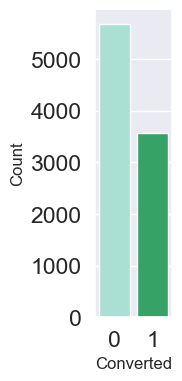

In [45]:
#With above we have 38% of coverted data. Let plot the count in graph.
plt.figure(figsize=(1,4))
sns.set(font_scale=1.5)
sns.countplot(x='Converted',data=lead,palette='BuGn',saturation=1)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

plt.show()

##### Lets plot the graph of remaining columns with converted rate for each value:

<Figure size 4000x8000 with 0 Axes>

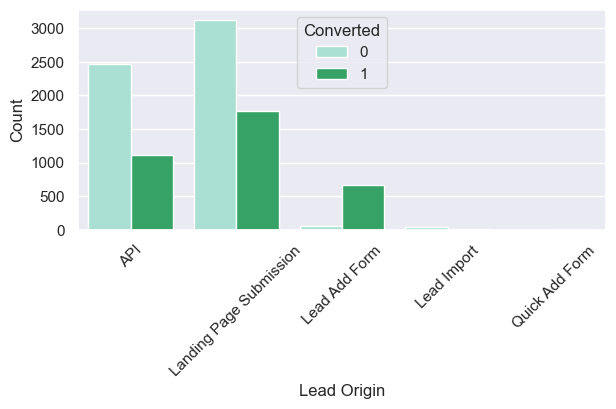

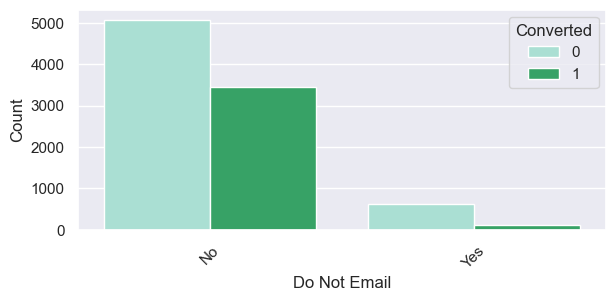

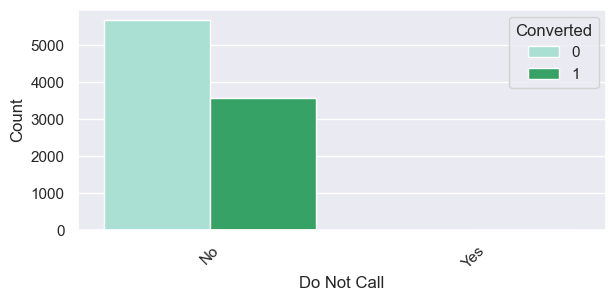

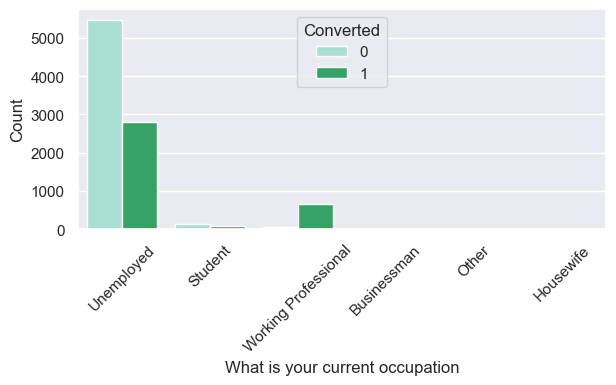

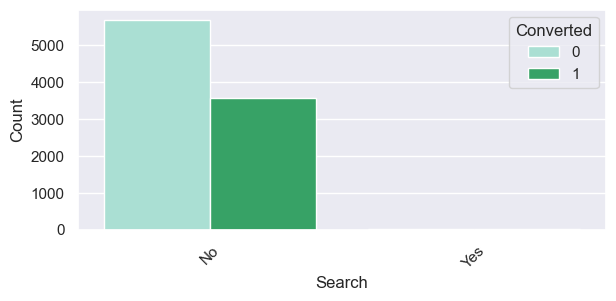

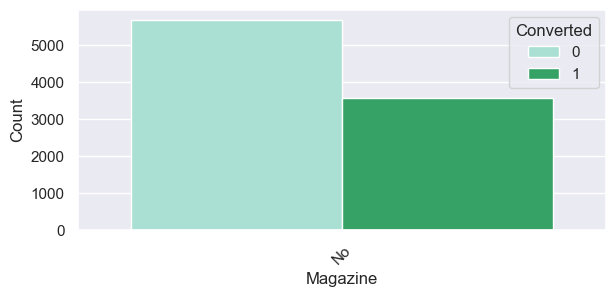

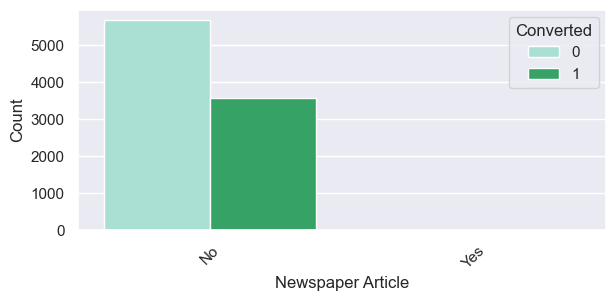

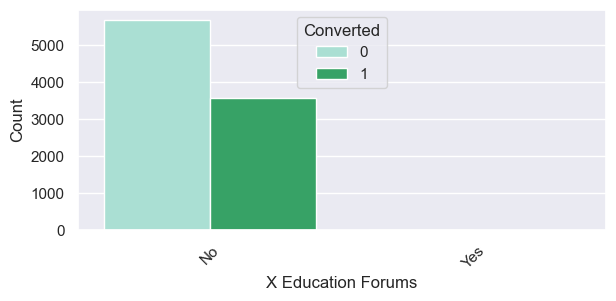

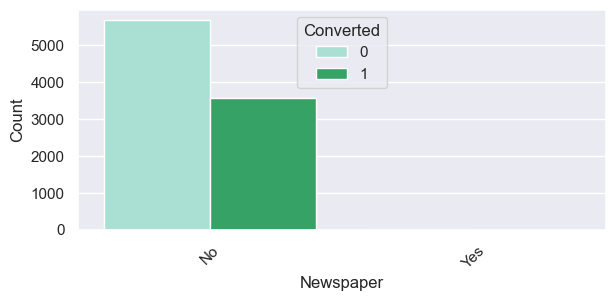

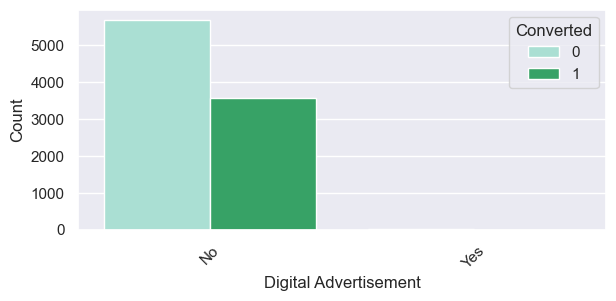

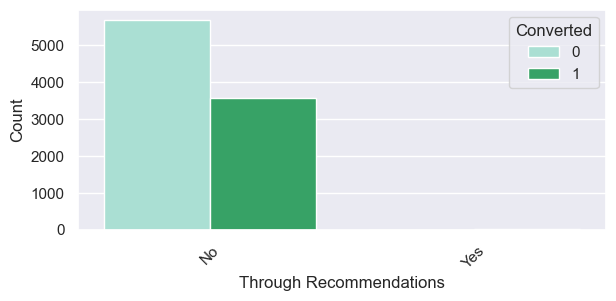

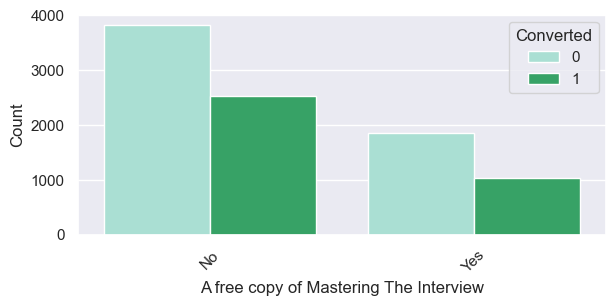

In [46]:
col_grp=['Lead Origin','Do Not Email', 'Do Not Call',
       'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview']
plt.figure(figsize=(40,80))
sns.set(font_scale=1)
plt.subplots_adjust(hspace=1)
for x in enumerate(col_grp):
    plt.figure(figsize=(15,20))
    plt.subplot(6,2,x[0]+1)
    sns.countplot(data=lead,x=x[1],hue='Converted',palette='BuGn',saturation=1)
    plt.xticks(rotation=45)
    plt.xlabel(x[1], fontsize = 12)
    plt.ylabel("Count", fontsize = 12)
    
plt.show()
#plot = sns.catplot(x="Lead Source", hue = "Converted", kind='count' ,data=lead, palette='OrRd');

###### From above we can inference the following :
1. Lead Origin: Most of the lead are coverted which lands on a submission page followed by API. Coversion rate is high on Lead add form but we don't have many leads on that category.
2. For Do not Email and Do not call, almost all the people opted for No, but still some of the lead got converted.
3. What is your Occupation: It is clear that high number of conversioan are of Working professional, also we can see that the unemployed people are in huge numbers out which almost 50% got converted.
4. From Search, Magazine, Newspaper Article, X Education Forums, Newpaper, Digital Advertisement, Through Recommendation not able to drawn any inference as almost 99% of the data has No in response. Hence we can delete these columns.
5. Free Copy of Mastering the Interview: People who do not want a free copy are likely to be converted more as compared to who wants a free copy.



In [47]:
Drop_col=lead[['Search', 'Magazine', 'Newspaper Article', 'X Education Forums','Newspaper', 
               'Digital Advertisement', 'Through Recommendations']]
lead.drop(Drop_col, axis=1, inplace=True)

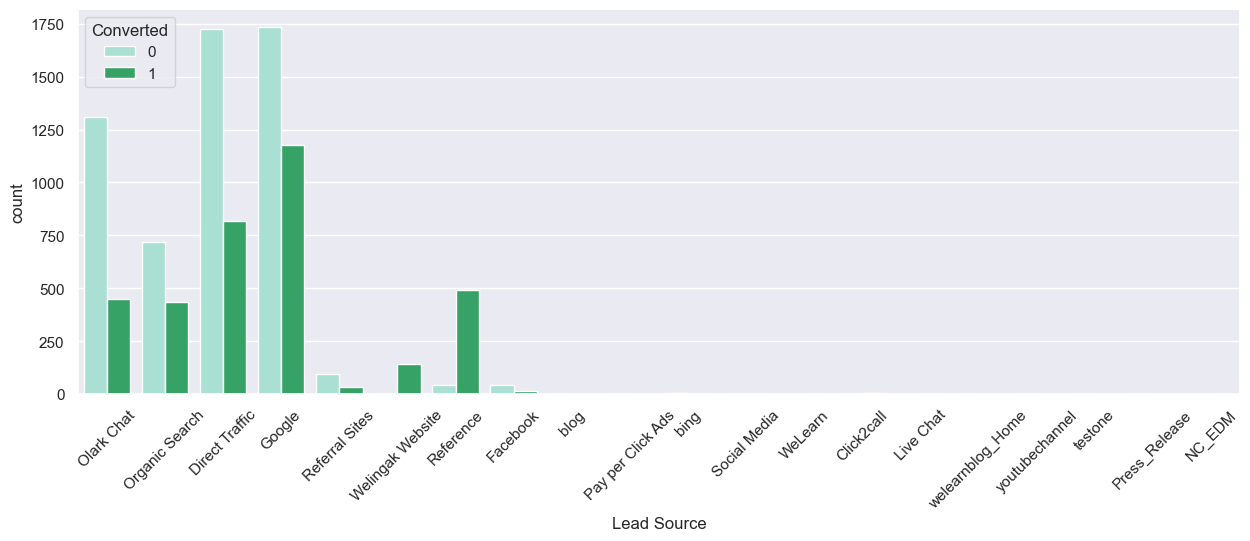

In [48]:
# Lead Source
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data=lead,palette='BuGn',saturation=1)
plt.xticks(rotation = 45)
plt.show()

1. From above we can see that most of the conversion happend through Google.
3. There are many categories which has very small values, hence merging them all into Others category.

In [49]:
lead['Lead Source'].replace(['blog', 'Pay per Click Ads', 'bing','Social Media', 'WeLearn', 'Click2call', 
                             'Live Chat','welearnblog_Home', 'youtubechannel',
                             'testone', 'Press_Release','NC_EDM'], 'Others',inplace=True)

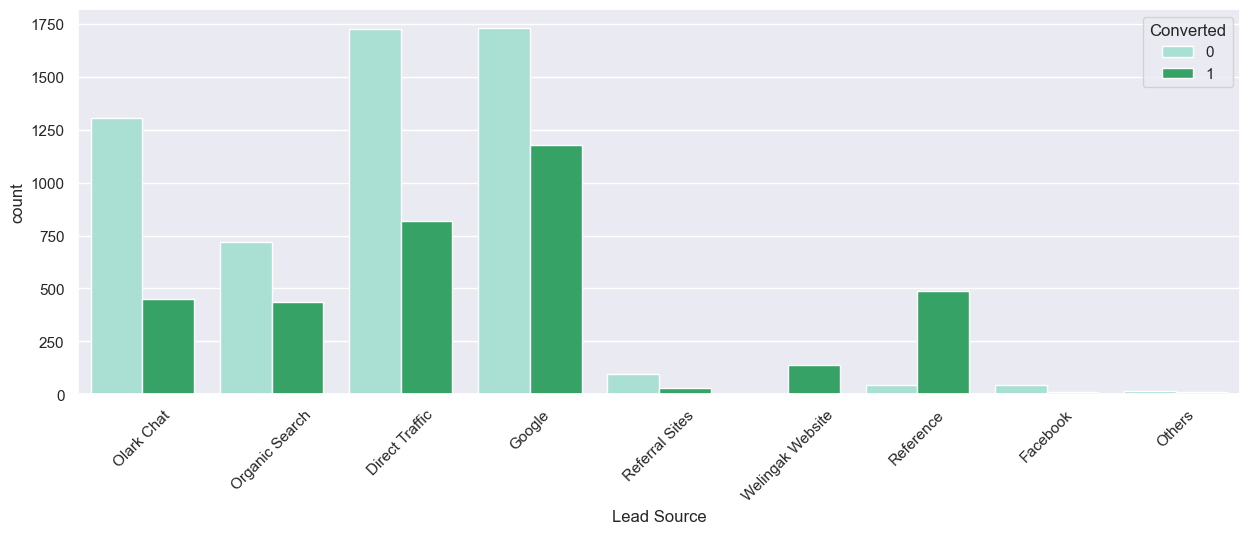

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data=lead,palette='BuGn',saturation=1)
plt.xticks(rotation = 45)
plt.show()

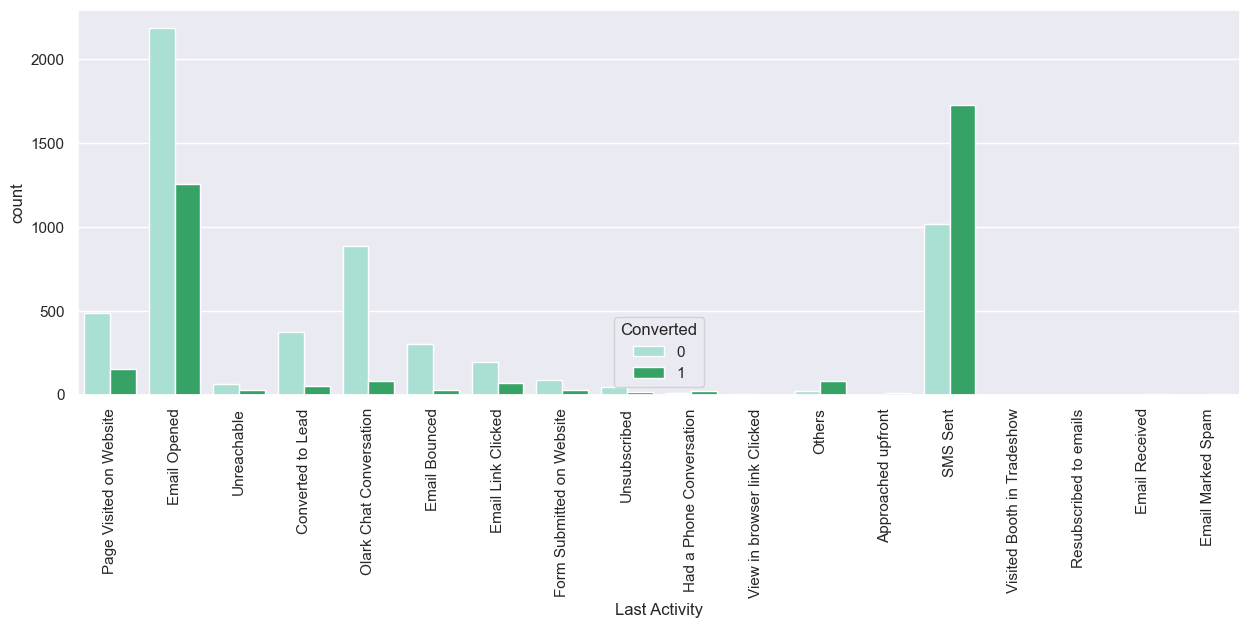

In [51]:
# Last Activity:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data=lead,palette='BuGn',saturation=1)
plt.xticks(rotation = 90)
plt.show()

Conversion rate is very high for SMS Sent value, and we have more lead for Email Opened but the conversion rate is 50%.

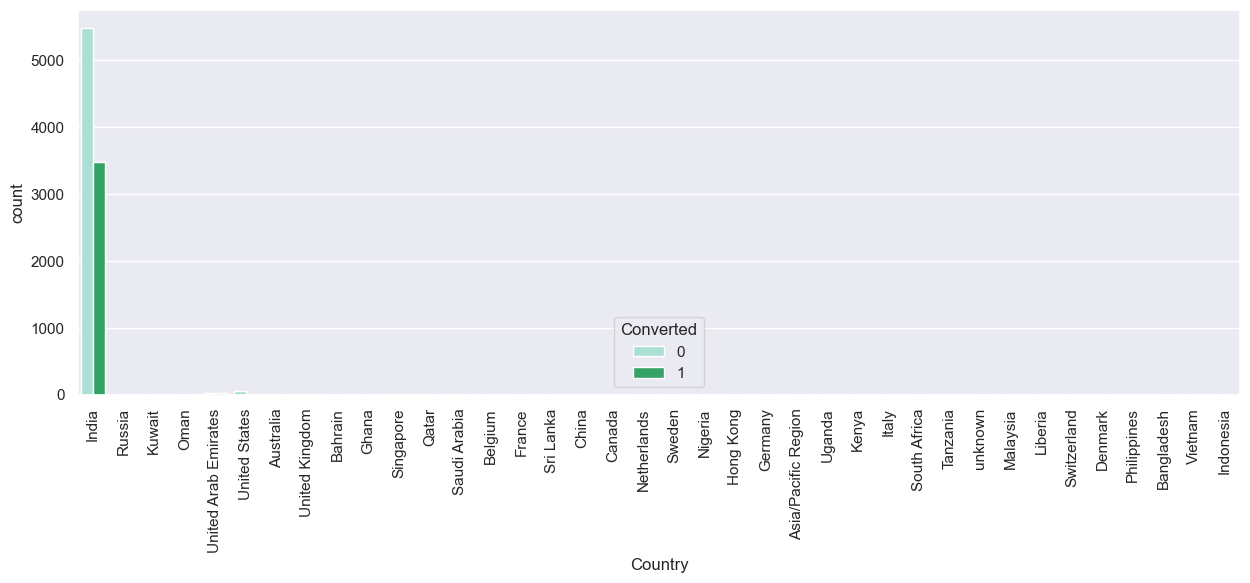

In [52]:
# Country
plt.figure(figsize=(15,5))
sns.countplot(x = "Country", hue = "Converted", data=lead,palette='BuGn',saturation=1)
plt.xticks(rotation = 90)
plt.show()

Almost all the values are from country India, hence there is no use of this column therefore we can drop it.

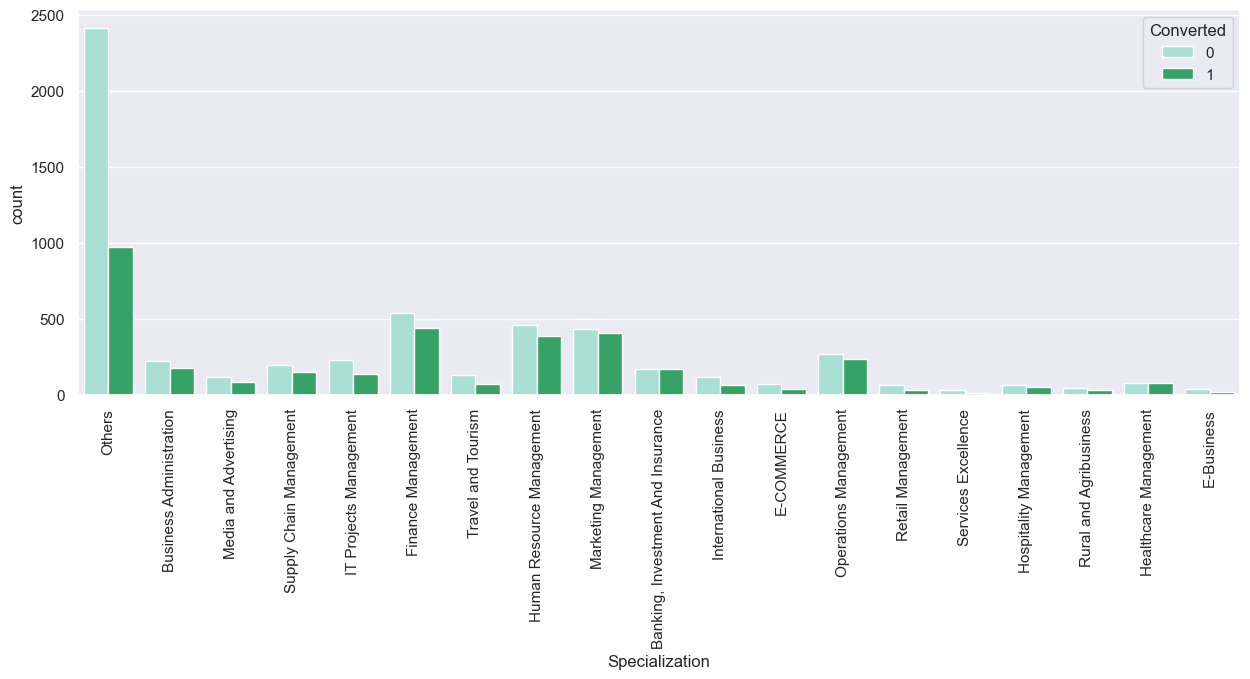

In [53]:
# Specilization:
plt.figure(figsize=(15,5))
sns.countplot(x = "Specialization", hue = "Converted", data=lead,palette='BuGn',saturation=1)
plt.xticks(rotation = 90)
plt.show()

From above Finance, HR and Marketing People are more likely to opting the course.

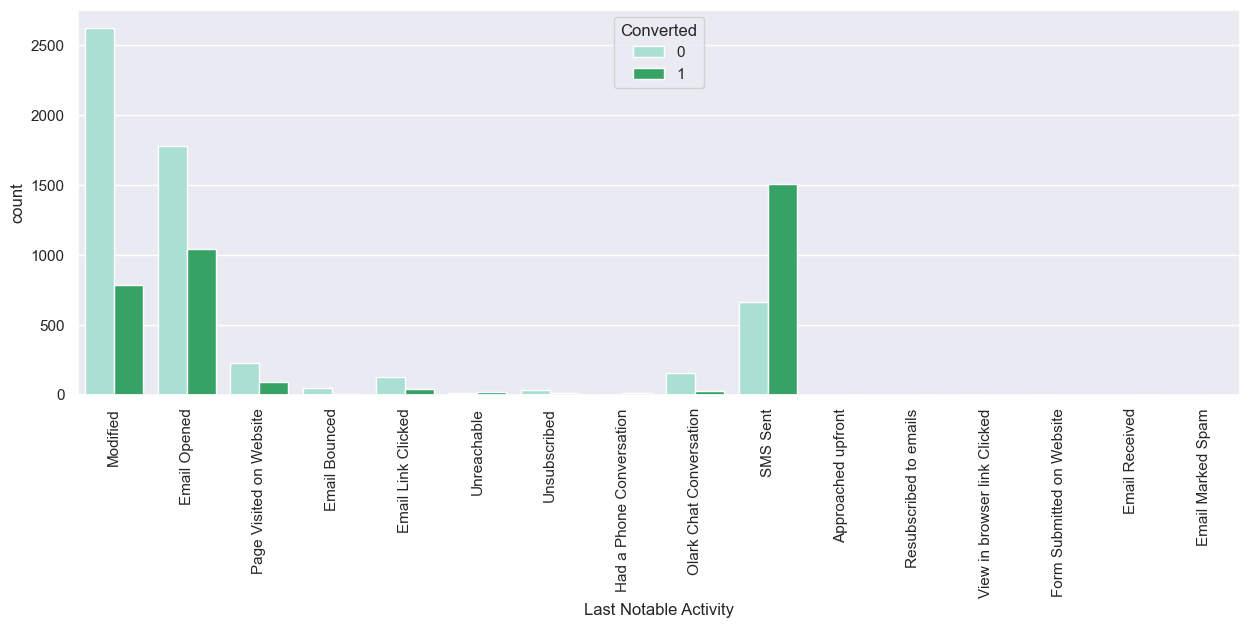

In [54]:
#Last Notable Activity:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data=lead,palette='BuGn',saturation=1)
plt.xticks(rotation = 90)
plt.show()

Here also the conversion rate is high for SMS sent.

##### Graph for Numerical Data:


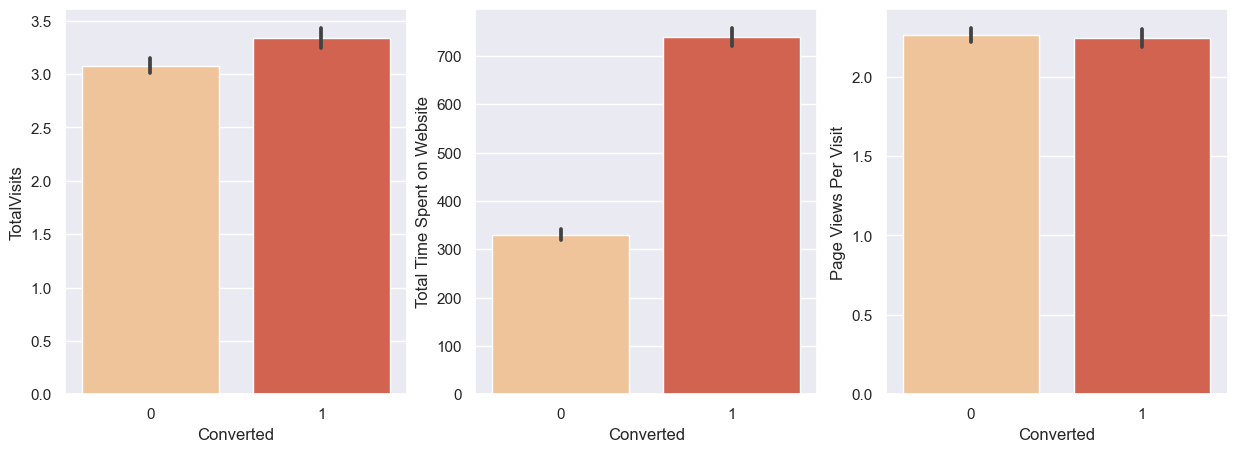

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='OrRd', data = lead)
plt.subplot(1,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='OrRd', data = lead)
plt.subplot(1,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='OrRd', data = lead)
plt.show()

From above we can clearly see that the conversion rate much higher in Total Time Spent on Website.

In [56]:
# Dropping the remaining unwanted columns: Deleting the Prospect ID as well, as we can identify the unique student by 
# Lead Number as well.
drop_col=lead[['Country','Tags','Prospect ID']]
lead.drop(drop_col,axis=1,inplace=True)
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,Modified


In [57]:
lead.shape

(9240, 14)

### 4. Data Preparation:
##### Converting Yes\No value column to Binary value(0\1).


In [58]:
# Making the list of column to map the binary value:
col_list= ['Do Not Email','Do Not Call', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

lead[col_list]=lead[col_list].apply(binary_map)

#####  Creating dummy variables for the categorical variables and dropping the level with big names.

In [59]:
# Lead Origin : 

origin = pd.get_dummies(lead['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
origin1 = origin.drop(['LeadOrigin_Lead Add Form'], axis=1)
#Adding the results to the master dataframe
lead = pd.concat([lead, origin1], axis = 1)

# Lead Source :

source = pd.get_dummies(lead['Lead Source'], prefix='LeadSource')
# Dropping blog column
source1 = source.drop(['LeadSource_Welingak Website'], axis=1)
# Adding the results to the master dataframe
lead = pd.concat([lead,source1], axis=1)

# last Activity

last_activity = pd.get_dummies(lead['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
last_activity1 = last_activity.drop(['LastActivity_Resubscribed to emails'], axis=1)
# Adding the results to the master dataframe
lead = pd.concat([lead,last_activity1], axis=1)

# Specialization

speci = pd.get_dummies(lead['Specialization'], prefix='Specialization')
# Dropping Resubscribed to emails column
speci1 = speci.drop(['Specialization_Banking, Investment And Insurance'], axis=1)
# Adding the results to the master dataframe
lead = pd.concat([lead,speci1], axis=1)

# What is your current occupation

occupation = pd.get_dummies(lead['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
occupation1 = occupation.drop(['CurrentOccupation_Businessman'], axis=1)
# Adding the results to the master dataframe
lead = pd.concat([lead,occupation1], axis=1)

# Last Notable Activity

notable_activity = pd.get_dummies(lead['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
notable_activity1 = notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], axis=1)
# Adding the results to the master dataframe
lead = pd.concat([lead,notable_activity1], axis=1)

lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,1,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,1,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,1,0,0,0,0,0,0


In [60]:
# Deleting the repeated columns from datase.
lead.drop(['Lead Origin','Lead Source','Last Activity','Specialization',
           'What is your current occupation','Last Notable Activity'], axis=1, inplace=True)

In [61]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Lead Number                                       9240 non-null   int64  
 1   Do Not Email                                      9240 non-null   int64  
 2   Do Not Call                                       9240 non-null   int64  
 3   Converted                                         9240 non-null   int64  
 4   TotalVisits                                       9240 non-null   float64
 5   Total Time Spent on Website                       9240 non-null   int64  
 6   Page Views Per Visit                              9240 non-null   float64
 7   A free copy of Mastering The Interview            9240 non-null   int64  
 8   LeadOrigin_API                                    9240 non-null   uint8  
 9   LeadOrigin_Landing 

### 5. Test-Train Split

In [62]:
# Importing required file 
from sklearn.model_selection import train_test_split

In [63]:
# Putting feature variable to X
X= lead.drop(['Lead Number','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [64]:
# Putting response variable to y
y= lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 6. Feature Scaling with Standard Scalar

In [66]:
# importing required file
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 
                                                                           'Total Time Spent on Website',
                                                                            'Page Views Per Visit']])
X_train.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
1871,0,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.299722,0.005716,-0.516439,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.662077,-0.691418,0.143543,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.662077,1.365219,1.553761,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### 7. Model Building
Let's start by splitting our data into a training set and a test set
###### Selecting Feature using RFE

In [68]:
# importing required file and running the first model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

In [69]:
rfe = RFE(logreg, n_features_to_select=20) #selecting 20 feature for this model
rfe = rfe.fit(X_train, y_train)

In [70]:
list(zip(X_train, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 16),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('A free copy of Mastering The Interview', False, 24),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Import', True, 1),
 ('LeadOrigin_Quick Add Form', False, 50),
 ('LeadSource_Direct Traffic', False, 2),
 ('LeadSource_Facebook', True, 1),
 ('LeadSource_Google', False, 4),
 ('LeadSource_Olark Chat', False, 30),
 ('LeadSource_Organic Search', False, 3),
 ('LeadSource_Others', False, 9),
 ('LeadSource_Reference', False, 5),
 ('LeadSource_Referral Sites', True, 1),
 ('LastActivity_Approached upfront', True, 1),
 ('LastActivity_Converted to Lead', False, 20),
 ('LastActivity_Email Bounced', False, 18),
 ('LastActivity_Email Link Clicked', False, 29),
 ('LastActivity_Email Marked Spam', False, 32),
 ('LastActivity_Email Opened', True, 1),
 ('LastActivity_Email Received', Fa

In [71]:
#Assigning the 20 selecting columns to a col variable.
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Import',
       'LeadSource_Facebook', 'LeadSource_Referral Sites',
       'LastActivity_Approached upfront', 'LastActivity_Email Opened',
       'LastActivity_Had a Phone Conversation', 'LastActivity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'CurrentOccupation_Housewife', 'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Unreachable'],
      dtype='object')

##### Assessing the model with StatsModels
### Model 1

In [72]:
X_train_sm = sm.add_constant(X_train[col])
mod1 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = mod1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.0
Date:                Sun, 18 Jun 2023   Deviance:                       5317.9
Time:                        16:30:53   Pearson chi2:                 7.57e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3978
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            3.1978      0.221     14.498      0.000       2.765       3.630
Do Not Email                                    -1.0435      0.170     -6.125      0.000      -1.377      -0.710
Total Time Spent on Website                      0.9744      0.037     26.689      0.000       0.903       1.046
LeadOrigin_API                                  -3.1078      0.184    -16.905      0.000      -3.468      -2.747
LeadOrigin_Landing Page Submission              -4.5557      0.200    -22.834      0.000      -4.947      -4.165
LeadOrigin_Lead Import                          -3.0288      1.951     -1.553      0.120      -6.852       0.794
LeadSource_Facebook                             -0.5018      1.943     -0.258      0.796      -4.310       3.306
LeadSource_Referral Sites                       -0.4146      0.302     -1.372      0.170      -1.007       0.178
LastActivity_Approached upfront                 24.6849   2.64e+04      0.001      0.999   -5.17e+04    5.18e+04
LastActivity_Email Opened                        1.0838      0.157      6.912      0.000       0.776       1.391
LastActivity_Had a Phone Conversation            1.5298      0.950      1.610      0.107      -0.333       3.392
LastActivity_SMS Sent                            1.4639      0.110     13.291      0.000       1.248       1.680
Specialization_Hospitality Management           -1.0442      0.333     -3.134      0.002      -1.697      -0.391
Specialization_Others                           -1.0861      0.123     -8.827      0.000      -1.327      -0.845
CurrentOccupation_Housewife                     24.0019   2.15e+04      0.001      0.999   -4.21e+04    4.21e+04
CurrentOccupation_Working Professional           2.6635      0.193     13.806      0.000       2.285       3.042
LastNotableActivity_Email Opened                -0.9569      0.178     -5.382      0.000      -1.305      -0.608
LastNotableActivity_Had a Phone Conversation     1.7378      1.460      1.190      0.234      -1.124       4.600
LastNotableActivity_Modified                    -1.2008      0.109    -11.051      0.000      -1.414      -0.988
LastNotableActivity_Olark Chat Conversation     -0.8873      0.343     -2.586      0.010      -1.560      -0.215
LastNotableActivity_Unreachable                  1.5349      0.522      2.940      0.003       0.512       2.558
================================================================================================================
"""

Removing column LastActivity_Approached upfront as it has a high pvalue and hence is insignificant

In [73]:
col = col.drop('LastActivity_Approached upfront', 1)

### Model 2

In [74]:
X_train_sm = sm.add_constant(X_train[col])
mod2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = mod2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2665.4
Date:                Sun, 18 Jun 2023   Deviance:                       5330.7
Time:                        16:30:54   Pearson chi2:                 7.59e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3966
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            3.2187      0.220     14.605      0.000       2.787       3.651
Do Not Email                                    -1.0543      0.170     -6.192      0.000      -1.388      -0.721
Total Time Spent on Website                      0.9755      0.036     26.747      0.000       0.904       1.047
LeadOrigin_API                                  -3.1229      0.184    -17.015      0.000      -3.483      -2.763
LeadOrigin_Landing Page Submission              -4.5643      0.199    -22.884      0.000      -4.955      -4.173
LeadOrigin_Lead Import                          -3.0442      1.951     -1.560      0.119      -6.869       0.780
LeadSource_Facebook                             -0.5072      1.944     -0.261      0.794      -4.316       3.302
LeadSource_Referral Sites                       -0.4208      0.302     -1.393      0.164      -1.013       0.171
LastActivity_Email Opened                        1.0602      0.156      6.779      0.000       0.754       1.367
LastActivity_Had a Phone Conversation            1.5069      0.950      1.586      0.113      -0.356       3.370
LastActivity_SMS Sent                            1.4496      0.110     13.197      0.000       1.234       1.665
Specialization_Hospitality Management           -1.0471      0.333     -3.144      0.002      -1.700      -0.394
Specialization_Others                           -1.0796      0.123     -8.782      0.000      -1.320      -0.839
CurrentOccupation_Housewife                     22.9915    1.3e+04      0.002      0.999   -2.55e+04    2.55e+04
CurrentOccupation_Working Professional           2.6582      0.193     13.791      0.000       2.280       3.036
LastNotableActivity_Email Opened                -0.9453      0.178     -5.320      0.000      -1.294      -0.597
LastNotableActivity_Had a Phone Conversation     1.7496      1.460      1.198      0.231      -1.113       4.612
LastNotableActivity_Modified                    -1.1894      0.108    -10.969      0.000      -1.402      -0.977
LastNotableActivity_Olark Chat Conversation     -0.8988      0.343     -2.620      0.009      -1.571      -0.226
LastNotableActivity_Unreachable                  1.5247      0.522      2.921      0.003       0.502       2.548
================================================================================================================
"""

Removing column CurrentOccupation_Housewife as it has a high pvalue and hence is insignificant

In [75]:
col = col.drop('CurrentOccupation_Housewife', 1)

### Model 3

In [76]:
X_train_sm = sm.add_constant(X_train[col])
mod3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = mod3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2672.8
Date:                Sun, 18 Jun 2023   Deviance:                       5345.6
Time:                        16:30:54   Pearson chi2:                 7.61e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3952
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            3.2317      0.220     14.707      0.000       2.801       3.662
Do Not Email                                    -1.0591      0.170     -6.223      0.000      -1.393      -0.725
Total Time Spent on Website                      0.9746      0.036     26.757      0.000       0.903       1.046
LeadOrigin_API                                  -3.1323      0.183    -17.084      0.000      -3.492      -2.773
LeadOrigin_Landing Page Submission              -4.5678      0.199    -22.959      0.000      -4.958      -4.178
LeadOrigin_Lead Import                          -3.0553      1.952     -1.566      0.117      -6.880       0.770
LeadSource_Facebook                             -0.5069      1.944     -0.261      0.794      -4.317       3.303
LeadSource_Referral Sites                       -0.4233      0.302     -1.402      0.161      -1.015       0.168
LastActivity_Email Opened                        1.0654      0.156      6.836      0.000       0.760       1.371
LastActivity_Had a Phone Conversation            1.5001      0.950      1.579      0.114      -0.362       3.362
LastActivity_SMS Sent                            1.4429      0.110     13.155      0.000       1.228       1.658
Specialization_Hospitality Management           -1.0531      0.333     -3.163      0.002      -1.706      -0.401
Specialization_Others                           -1.0834      0.123     -8.823      0.000      -1.324      -0.843
CurrentOccupation_Working Professional           2.6504      0.193     13.757      0.000       2.273       3.028
LastNotableActivity_Email Opened                -0.9499      0.177     -5.361      0.000      -1.297      -0.603
LastNotableActivity_Had a Phone Conversation     1.7472      1.460      1.197      0.231      -1.114       4.609
LastNotableActivity_Modified                    -1.1858      0.108    -10.948      0.000      -1.398      -0.974
LastNotableActivity_Olark Chat Conversation     -0.9006      0.343     -2.625      0.009      -1.573      -0.228
LastNotableActivity_Unreachable                  1.5184      0.522      2.910      0.004       0.496       2.541
================================================================================================================
"""

Removing column LeadSource_Facebook as it has a high pvalue and hence is insignificant

In [77]:
col = col.drop('LeadSource_Facebook', 1)

### Model 4

In [78]:
X_train_sm = sm.add_constant(X_train[col])
mod4 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = mod4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2672.8
Date:                Sun, 18 Jun 2023   Deviance:                       5345.6
Time:                        16:30:54   Pearson chi2:                 7.61e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3952
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            3.2322      0.220     14.710      0.000       2.802       3.663
Do Not Email                                    -1.0588      0.170     -6.222      0.000      -1.392      -0.725
Total Time Spent on Website                      0.9746      0.036     26.757      0.000       0.903       1.046
LeadOrigin_API                                  -3.1322      0.183    -17.083      0.000      -3.492      -2.773
LeadOrigin_Landing Page Submission              -4.5685      0.199    -22.964      0.000      -4.958      -4.179
LeadOrigin_Lead Import                          -3.5477      0.533     -6.658      0.000      -4.592      -2.503
LeadSource_Referral Sites                       -0.4233      0.302     -1.402      0.161      -1.015       0.168
LastActivity_Email Opened                        1.0654      0.156      6.836      0.000       0.760       1.371
LastActivity_Had a Phone Conversation            1.5002      0.950      1.579      0.114      -0.362       3.362
LastActivity_SMS Sent                            1.4427      0.110     13.153      0.000       1.228       1.658
Specialization_Hospitality Management           -1.0533      0.333     -3.164      0.002      -1.706      -0.401
Specialization_Others                           -1.0842      0.123     -8.834      0.000      -1.325      -0.844
CurrentOccupation_Working Professional           2.6503      0.193     13.757      0.000       2.273       3.028
LastNotableActivity_Email Opened                -0.9498      0.177     -5.360      0.000      -1.297      -0.602
LastNotableActivity_Had a Phone Conversation     1.7472      1.460      1.197      0.231      -1.114       4.609
LastNotableActivity_Modified                    -1.1858      0.108    -10.948      0.000      -1.398      -0.974
LastNotableActivity_Olark Chat Conversation     -0.9004      0.343     -2.625      0.009      -1.573      -0.228
LastNotableActivity_Unreachable                  1.5185      0.522      2.910      0.004       0.496       2.541
================================================================================================================
"""

Removing column LastNotableActivity_Had a Phone Conversation as it has a high pvalue and hence is insignificant

In [79]:
col = col.drop('LastNotableActivity_Had a Phone Conversation', 1)

### Model 5

In [80]:
X_train_sm = sm.add_constant(X_train[col])
mod5 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = mod5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2673.6
Date:                Sun, 18 Jun 2023   Deviance:                       5347.2
Time:                        16:30:54   Pearson chi2:                 8.64e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3951
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           3.2407      0.220     14.749      0.000       2.810       3.671
Do Not Email                                   -1.0619      0.170     -6.243      0.000      -1.395      -0.729
Total Time Spent on Website                     0.9733      0.036     26.742      0.000       0.902       1.045
LeadOrigin_API                                 -3.1317      0.183    -17.077      0.000      -3.491      -2.772
LeadOrigin_Landing Page Submission             -4.5682      0.199    -22.953      0.000      -4.958      -4.178
LeadOrigin_Lead Import                         -3.5448      0.533     -6.654      0.000      -4.589      -2.501
LeadSource_Referral Sites                      -0.4363      0.303     -1.439      0.150      -1.031       0.158
LastActivity_Email Opened                       1.0685      0.156      6.856      0.000       0.763       1.374
LastActivity_Had a Phone Conversation           2.3875      0.682      3.500      0.000       1.051       3.724
LastActivity_SMS Sent                           1.4372      0.110     13.119      0.000       1.223       1.652
Specialization_Hospitality Management          -1.0533      0.333     -3.164      0.002      -1.706      -0.401
Specialization_Others                          -1.0867      0.123     -8.856      0.000      -1.327      -0.846
CurrentOccupation_Working Professional          2.6468      0.193     13.735      0.000       2.269       3.024
LastNotableActivity_Email Opened               -0.9603      0.177     -5.426      0.000      -1.307      -0.613
LastNotableActivity_Modified                   -1.1959      0.108    -11.073      0.000      -1.408      -0.984
LastNotableActivity_Olark Chat Conversation    -0.9074      0.343     -2.646      0.008      -1.580      -0.235
LastNotableActivity_Unreachable                 1.5107      0.522      2.896      0.004       0.488       2.533
===============================================================================================================
"""

In [81]:
# Dropping LeadSource_Referral Sites as it has very high p-value.
col = col.drop('LeadSource_Referral Sites', 1)

### Model 6

In [82]:
X_train_sm = sm.add_constant(X_train[col])
mod6 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = mod6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.7
Date:                Sun, 18 Jun 2023   Deviance:                       5349.4
Time:                        16:30:54   Pearson chi2:                 8.60e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3949
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           3.2370      0.220     14.735      0.000       2.806       3.668
Do Not Email                                   -1.0604      0.170     -6.235      0.000      -1.394      -0.727
Total Time Spent on Website                     0.9713      0.036     26.718      0.000       0.900       1.043
LeadOrigin_API                                 -3.1436      0.183    -17.155      0.000      -3.503      -2.784
LeadOrigin_Landing Page Submission             -4.5714      0.199    -22.967      0.000      -4.962      -4.181
LeadOrigin_Lead Import                         -3.5441      0.533     -6.654      0.000      -4.588      -2.500
LastActivity_Email Opened                       1.0684      0.156      6.858      0.000       0.763       1.374
LastActivity_Had a Phone Conversation           2.3737      0.685      3.467      0.001       1.032       3.716
LastActivity_SMS Sent                           1.4458      0.109     13.215      0.000       1.231       1.660
Specialization_Hospitality Management          -1.0501      0.333     -3.155      0.002      -1.702      -0.398
Specialization_Others                          -1.0909      0.123     -8.899      0.000      -1.331      -0.851
CurrentOccupation_Working Professional          2.6434      0.193     13.711      0.000       2.266       3.021
LastNotableActivity_Email Opened               -0.9545      0.177     -5.397      0.000      -1.301      -0.608
LastNotableActivity_Modified                   -1.1947      0.108    -11.065      0.000      -1.406      -0.983
LastNotableActivity_Olark Chat Conversation    -0.8903      0.343     -2.598      0.009      -1.562      -0.219
LastNotableActivity_Unreachable                 1.4999      0.524      2.864      0.004       0.474       2.526
===============================================================================================================
"""

In [83]:
col = col.drop('LastNotableActivity_Unreachable',1)

Model 6 looks more stable compare to previous models, it still has few feature with high p-value. But before delete them,
lets take a look at VIF also.

In [84]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,LastNotableActivity_Email Opened,8.06
5,LastActivity_Email Opened,7.23
2,LeadOrigin_API,4.66
9,Specialization_Others,4.03
3,LeadOrigin_Landing Page Submission,3.95
12,LastNotableActivity_Modified,2.78
7,LastActivity_SMS Sent,2.15
0,Do Not Email,1.18
10,CurrentOccupation_Working Professional,1.14
13,LastNotableActivity_Olark Chat Conversation,1.14


In [86]:
# Dropping LastNotableActivity_Email Opened feature as it has very high VIF value.
col = col.drop('LastNotableActivity_Email Opened', 1)

### Model 7

In [87]:
X_train_sm = sm.add_constant(X_train[col])
mod7 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = mod7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2694.3
Date:                Sun, 18 Jun 2023   Deviance:                       5388.6
Time:                        16:30:55   Pearson chi2:                 8.99e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3912
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           3.0609      0.214     14.294      0.000       2.641       3.481
Do Not Email                                   -1.0543      0.169     -6.240      0.000      -1.386      -0.723
Total Time Spent on Website                     0.9695      0.036     26.770      0.000       0.899       1.040
LeadOrigin_API                                 -3.1299      0.183    -17.087      0.000      -3.489      -2.771
LeadOrigin_Landing Page Submission             -4.5631      0.198    -23.002      0.000      -4.952      -4.174
LeadOrigin_Lead Import                         -3.6439      0.534     -6.826      0.000      -4.690      -2.598
LastActivity_Email Opened                       0.3804      0.105      3.620      0.000       0.174       0.586
LastActivity_Had a Phone Conversation           2.4202      0.682      3.550      0.000       1.084       3.756
LastActivity_SMS Sent                           1.5499      0.104     14.845      0.000       1.345       1.754
Specialization_Hospitality Management          -1.0299      0.329     -3.135      0.002      -1.674      -0.386
Specialization_Others                          -1.0957      0.122     -8.959      0.000      -1.335      -0.856
CurrentOccupation_Working Professional          2.6568      0.193     13.789      0.000       2.279       3.034
LastNotableActivity_Modified                   -0.8895      0.087    -10.203      0.000      -1.060      -0.719
LastNotableActivity_Olark Chat Conversation    -0.7235      0.340     -2.129      0.033      -1.390      -0.057
===============================================================================================================
"""

In [88]:
# Dropping LastNotableActivity_Olark Chat Conversation feature as it has very high p-value.
col = col.drop('LastNotableActivity_Olark Chat Conversation', 1)

### Model 8

In [89]:
X_train_sm = sm.add_constant(X_train[col])
mod8 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = mod8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.8
Date:                Sun, 18 Jun 2023   Deviance:                       5393.6
Time:                        16:30:55   Pearson chi2:                 9.10e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3907
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      3.0032      0.212     14.134      0.000       2.587       3.420
Do Not Email                              -1.0335      0.169     -6.123      0.000      -1.364      -0.703
Total Time Spent on Website                0.9699      0.036     26.791      0.000       0.899       1.041
LeadOrigin_API                            -3.1435      0.183    -17.167      0.000      -3.502      -2.785
LeadOrigin_Landing Page Submission        -4.5704      0.199    -23.018      0.000      -4.960      -4.181
LeadOrigin_Lead Import                    -3.6460      0.534     -6.826      0.000      -4.693      -2.599
LastActivity_Email Opened                  0.4447      0.101      4.389      0.000       0.246       0.643
LastActivity_Had a Phone Conversation      2.4715      0.681      3.631      0.000       1.138       3.805
LastActivity_SMS Sent                      1.6100      0.101     15.914      0.000       1.412       1.808
Specialization_Hospitality Management     -1.0295      0.329     -3.133      0.002      -1.674      -0.385
Specialization_Others                     -1.1051      0.122     -9.027      0.000      -1.345      -0.865
CurrentOccupation_Working Professional     2.6651      0.193     13.819      0.000       2.287       3.043
LastNotableActivity_Modified              -0.8516      0.085     -9.968      0.000      -1.019      -0.684
==========================================================================================================
"""

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,LeadOrigin_API,4.35
9,Specialization_Others,3.95
3,LeadOrigin_Landing Page Submission,3.27
5,LastActivity_Email Opened,2.38
7,LastActivity_SMS Sent,1.97
11,LastNotableActivity_Modified,1.90
0,Do Not Email,1.17
10,CurrentOccupation_Working Professional,1.14
1,Total Time Spent on Website,1.12
4,LeadOrigin_Lead Import,1.05


#### Model 8 looks very stable all the p-values and VIF value are significant. Hence we can go ahead with this model for Prediction and Evaluation 

- Predicting value on train set by using Model 12 result.

In [91]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.364863
6795    0.097790
3516    0.186751
8105    0.796871
3934    0.075090
4844    0.989171
3297    0.138196
8071    0.999120
987     0.181030
7423    0.907175
dtype: float64

In [92]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.36486344, 0.09779012, 0.18675065, 0.79687134, 0.07508951,
       0.98917145, 0.13819582, 0.99911992, 0.18103031, 0.907175  ])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [93]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['LeadNumber'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,LeadNumber
0,0,0.364863,1871
1,0,0.097790,6795
2,0,0.186751,3516
3,0,0.796871,8105
4,0,0.075090,3934


##### Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

In [94]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x : 1 if x> 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,LeadNumber,Predicted
0,0,0.364863,1871,0
1,0,0.097790,6795,0
2,0,0.186751,3516,0
3,0,0.796871,8105,1
4,0,0.075090,3934,0


###### Checking confusion metric and accuracy

In [95]:
from sklearn import metrics

In [96]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3578  424]
 [ 803 1663]]


In [97]:
# Predicted     not_converted  converted
# Actual
# not_converted    3583       419 
# converted        802        1664  

In [98]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8102968460111317


Accuracy rate is around 80% which is good. However we will also need to calculate the other metrics as we cannot depend only on the accuracy metrics
####  Metrics beyond simply accuracy


In [99]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6743714517437145

In [101]:
# Let us calculate specificity
TN / float(TN+FP)

0.8940529735132434

In [102]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10594702648675662


In [103]:
# positive predictive value 
print (TP / float(TP+FP))

0.7968375658840441


In [104]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8167085140378909


### 8. Plotting ROC curve

#### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [105]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [106]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

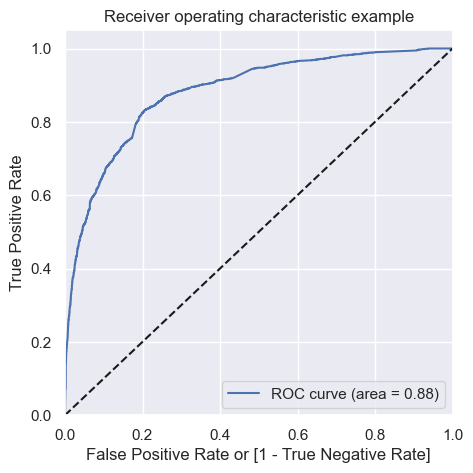

In [107]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### 9.Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [108]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,LeadNumber,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.364863,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.097790,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.186751,3516,0,1,1,0,0,0,0,0,0,0,0
3,0,0.796871,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.075090,3934,0,1,0,0,0,0,0,0,0,0,0


In [109]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.588281  0.969181  0.353573
0.2   0.2  0.751391  0.896999  0.661669
0.3   0.3  0.797001  0.847526  0.765867
0.4   0.4  0.805040  0.744526  0.842329
0.5   0.5  0.810297  0.674371  0.894053
0.6   0.6  0.800866  0.603812  0.922289
0.7   0.7  0.786951  0.526764  0.947276
0.8   0.8  0.764378  0.427413  0.972014
0.9   0.9  0.717996  0.278589  0.988756


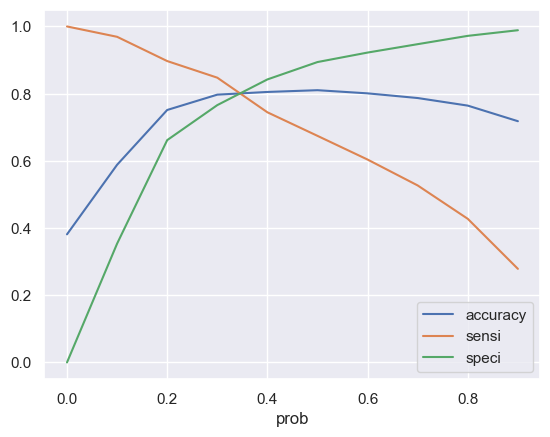

In [110]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [111]:
# Let us make the final prediction using 0.38 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,LeadNumber,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.364863,1871,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.097790,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.186751,3516,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.796871,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.075090,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [112]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.808286951144094


In [113]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3254,  748],
       [ 492, 1974]], dtype=int64)

In [114]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8004866180048662


In [116]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8130934532733634


In [117]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.18690654672663667


In [118]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7252020573108009


In [119]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8686599038974907


In [120]:
from sklearn.metrics import precision_score, recall_score

In [121]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted))

Precision : 0.7968375658840441


In [122]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Recall : 0.6743714517437145


In [123]:
from sklearn.metrics import precision_recall_curve

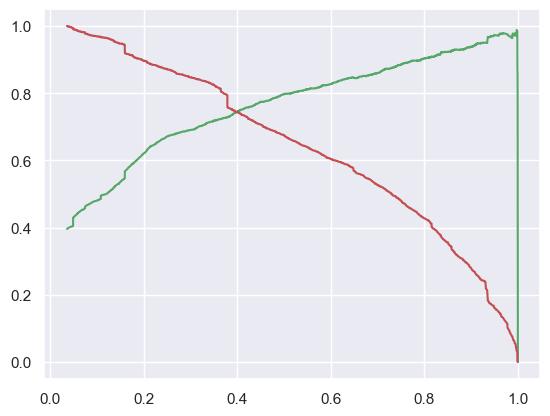

In [124]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Adding Lead Score to Training Dataset:
- A higher score would mean that the lead is hot, i.e. is most likely to convert
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [125]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,LeadNumber,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.364863,1871,0,1,1,1,1,0,0,0,0,0,0,0,36
1,0,0.097790,6795,0,1,0,0,0,0,0,0,0,0,0,0,10
2,0,0.186751,3516,0,1,1,0,0,0,0,0,0,0,0,0,19
3,0,0.796871,8105,1,1,1,1,1,1,1,1,1,0,0,1,80
4,0,0.075090,3934,0,1,0,0,0,0,0,0,0,0,0,0,8


## 10. Making predictions on the test set

In [126]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [127]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col]
X_test.head()


,Do Not Email,Total Time Spent on Website,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Import,LastActivity_Email Opened,LastActivity_Had a Phone Conversation,LastActivity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,CurrentOccupation_Working Professional,LastNotableActivity_Modified
4269,0,0.964504,1,0,0,0,0,1,0,1,0,0
2376,0,-0.885371,0,0,0,0,0,1,0,1,0,0
7766,0,-0.777416,1,0,0,0,0,0,0,0,1,0
9199,0,-0.885371,1,0,0,0,0,0,0,1,0,1
4359,0,-0.885371,0,0,0,1,0,0,0,0,0,0


In [128]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.785842
2376    0.933975
7766    0.854565
9199    0.049469
4359    0.930162
9186    0.567131
1631    0.454245
8963    0.234373
8007    0.064946
5324    0.370060
dtype: float64

In [129]:
# Converting y_test_pred to a dataframe which is an array
y_pred_test = pd.DataFrame(y_test_pred)

In [130]:
# Let's see the head
y_pred_test.head()

,0
4269,0.785842
2376,0.933975
7766,0.854565
9199,0.049469
4359,0.930162


In [131]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [132]:
# Putting Prospect ID to index
y_test_df['Lead Number'] = y_test_df.index

In [133]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [134]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.785842
1,1,2376,0.933975
2,1,7766,0.854565
3,0,9199,0.049469
4,1,4359,0.930162


In [135]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [136]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Lead Number','Converted','Converted_prob'])

In [137]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_prob
0,4269,1,0.785842
1,2376,1,0.933975
2,7766,1,0.854565
3,9199,0,0.049469
4,4359,1,0.930162


In [138]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

,Lead Number,Converted,Converted_prob,final_predicted
0,4269,1,0.785842,1
1,2376,1,0.933975,1
2,7766,1,0.854565,1
3,9199,0,0.049469,0
4,4359,1,0.930162,1


In [139]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8113275613275613


In [140]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1374,  303],
       [ 220,  875]], dtype=int64)

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7990867579908676


In [143]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8193202146690519


In [144]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7427843803056027
recall  0.7990867579908676


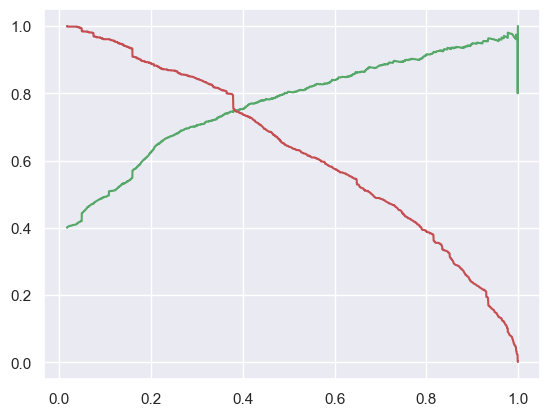

In [145]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Adding Lead Score to Test Dataset:
- The customers with a higher lead score have a higher conversion chance
- The customers with a lower lead score have a lower conversion chance.

In [146]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Lead Number,Converted,Converted_prob,final_predicted,Lead_Score
0,4269,1,0.785842,1,79
1,2376,1,0.933975,1,93
2,7766,1,0.854565,1,85
3,9199,0,0.049469,0,5
4,4359,1,0.930162,1,93


In [147]:
# features and their coefficicent from final model
res.params.sort_values(ascending=False)

const                                     3.003199
CurrentOccupation_Working Professional    2.665139
LastActivity_Had a Phone Conversation     2.471474
LastActivity_SMS Sent                     1.609961
Total Time Spent on Website               0.969856
LastActivity_Email Opened                 0.444659
LastNotableActivity_Modified             -0.851646
Specialization_Hospitality Management    -1.029502
Do Not Email                             -1.033534
Specialization_Others                    -1.105053
LeadOrigin_API                           -3.143492
LeadOrigin_Lead Import                   -3.646033
LeadOrigin_Landing Page Submission       -4.570372
dtype: float64

### 11. Conclusion of Lead dataset summay

#### Train Vs Test Dataset
----------------------------------------------------------------------------

###### Train Data:
-  ##### Accuracy : 80.8 %
-  ##### Sensitivity : 80.2 %
-  ##### Specificity : 81.3 %
 
###### Test Data:
-  ##### Accuracy : 81.1 %
-  ##### Sensitivity : 80 %
-  ##### Specificity : 82.11 %



- With Above scores, we have achieved the task given by the CEO as he wants the model prediction rate to be 80% which is the ballmark on target lead. Our model has provided the same on Training Data as well as Test Data.  
- Both Training and Test have similar result in their scores, hence we can say that our model is very stable and reliable.
- We have achieved our model with ROC cut-off 0.37, which means the converted_probability greater than 0.37 will convert the lead into Hot Leads and less than 0.37 will convert into Cold Lead.

#### Important features that are positively contributed in our model.

- CurrentOccupation_Working Professional 
- LastActivity_Had a Phone Conversation
- LastActivity_SMS Sent
- Total Time Spent on Website 


### 12. Recommendation

- Company should focus more on Working_Professional, there are high channces for them to convert into Hot Leads.

- Also Leads who spent more time on Website or Had a Phone conversation or who has sent SMS are more likely to convert into Hot Leads.

- Company should spent more on advertising as it can been seen some of the promising leads converted throgh Weblinks.

- Company should offers Discount or something to attract people through references as there high chances of them to be converted.

- Company can look into the features with negative coeff to improve them so that Lead should be converted.
